In [1]:
%run runaway_functionsv3

In [7]:
cl = Cluster("Berkeley_97")
cld = ClusterDias("Berkeley_97")

cl.distance, cld.distance

(<Quantity 2769. pc>, <Distance 2485. pc>)

getting isochrone form cmd3.7 with:
Av:3.10
logage:7.10
metallicity:-0.10
isochrone downloaded in 7.5s



(<Figure size 1200x1000 with 2 Axes>,
 <AxesSubplot: title={'center': 'CMD for Berkeley_97'}, xlabel='$G_{BP}-G_{RP}$ (mag)', ylabel='$G$ (mag)'>)

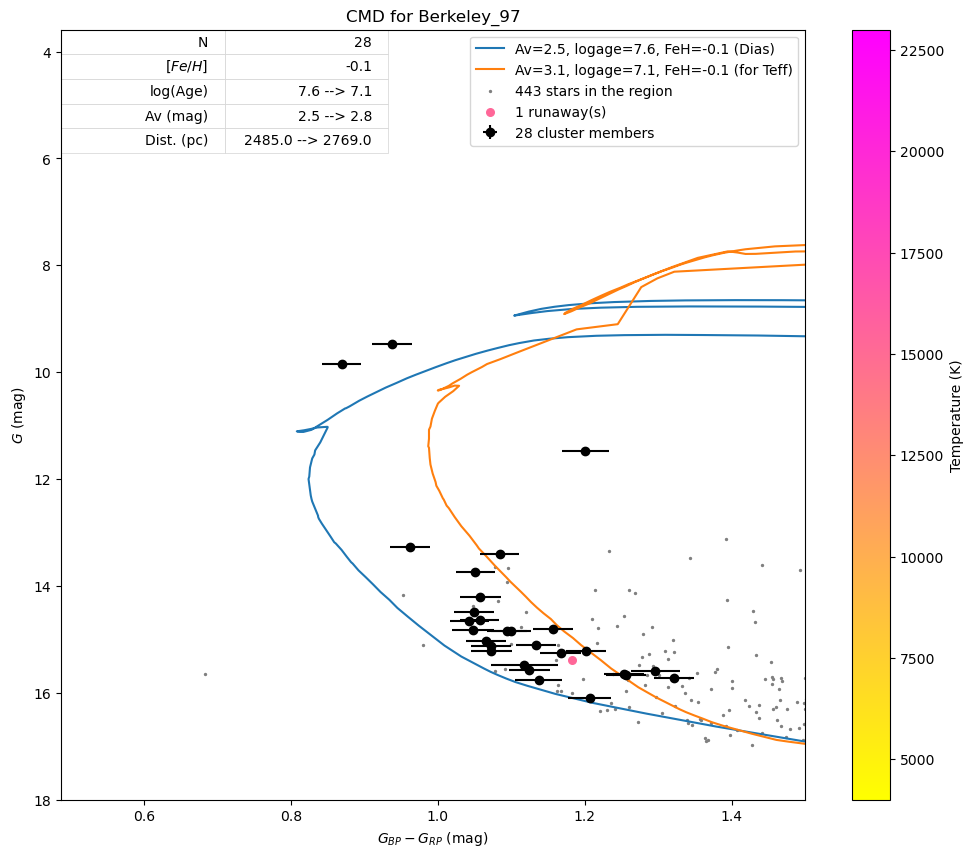

In [5]:
# Import necessary libraries
%run runaway_functionsv3

import matplotlib.pyplot as plt
from runaway_functionsv3 import Cluster, ClusterDias, estimate_temperature

# Function to plot isochrones
def plot_isochrones(ax, cluster, **kwargs):
    cluster_dias = ClusterDias(cluster.name)
    theoretical_isochrone_dias, (Av0, logage0, FeH0) = cluster_dias.theoretical_isochrone(returnparams=True)
    isochrone_theo_dias = ax.plot(
        theoretical_isochrone_dias['BP-RP'], 
        theoretical_isochrone_dias['Gmag'], 
        label=f'Av={Av0}, logage={logage0}, FeH={FeH0} (Dias, for Teff)'
    )[0]
    
    theoretical_isochrone_temp, (Av, logage, FeH) = cluster.theoretical_isochrone(kwargs, returnparams=True)
    if not (Av0 == Av and logage0 == logage and FeH0 == FeH):
        isochrone_theo_dias.set_label(f'Av={Av0}, logage={logage0}, FeH={FeH0} (Dias)')
        isochrone_theo = ax.plot(
            theoretical_isochrone_temp['BP-RP'], 
            theoretical_isochrone_temp['Gmag'], 
            label=f'Av={Av}, logage={logage}, FeH={FeH} (for Teff)'
        )[0]
    return isochrone_theo_dias

# Function to plot cluster members
def plot_cluster_members(ax, cluster):
    mymembers = cluster.mymembers
    scatter_members = ax.errorbar(
        mymembers['BP-RP'], mymembers['Gmag'], 
        color='black', zorder=2, fmt='o',
        xerr=mymembers['e_BP-RP']+0.02, yerr=mymembers['e_Gmag'],
        label=rf'{len(mymembers)} cluster members'
    )
    return scatter_members

# Function to plot stars in the region
def plot_stars_in_region(ax, cluster):
    stars_in_region = cluster.stars_in_region()
    scatter_sir = ax.scatter(
        stars_in_region['BP-RP'], stars_in_region['Gmag'],
        s=2, color='grey', zorder=1, label=f"{len(stars_in_region)} stars in the region"
    )
    return scatter_sir

# Function to plot runaways
def plot_runaways(ax, cluster, theoretical_isochrone_temp):
    runaways = cluster.runaways()
    runaways = estimate_temperature(runaways, theoretical_isochrone_temp)
    scatter_runaways = ax.scatter(
        runaways['BP-RP'], runaways['Gmag'],
        s=30, zorder=4,
        c=runaways['Temp. Est'],
        cmap='spring_r', norm=plt.Normalize(4000, 23000),
        label=f'{len(runaways)} runaway(s)'
    )
    return scatter_runaways

# Function to add colorbar
def add_colorbar(fig, scatter_runaways, ax):
    colorbar = fig.colorbar(scatter_runaways, ax=ax)
    colorbar.set_label('Temperature (K)')
    return colorbar

# Function to add cluster parameters table
def add_cluster_parameters_table(ax, cluster):
    cluster_dias = ClusterDias(cluster.name)
    print()
    cluster_table = [
        ['N', len(cluster.mymembers)],
        [r'$[Fe/H]$', cluster.FeH],
        ['log(Age)', cluster.logage],
        ['Av (mag)', round(cluster.Av.value, 2)],
        ['Dist. (pc)', str(round(cluster.distance.value))+"$\pm$"+f'{cluster.all["e_Dist"]}']
    ]

    if cluster.FeH != cluster_dias.FeH:
        cluster_table[1][1] = f'{cluster_dias.FeH:.1f} --> {round(float(cluster.FeH),1)}'
    if cluster.logage != cluster_dias.logage:
        cluster_table[2][1] = f'{cluster_dias.logage:.1f} --> {round(float(cluster.logage),1)}'
    if cluster.Av != cluster_dias.Av:
        cluster_table[3][1] = f'{cluster_dias.Av.value:.1f} --> {round(float(cluster.Av.value),1)}'
    if cluster.distance != cluster_dias.distance:
        cluster_table[4][1] = f'{cluster_dias.distance.value:.1f} --> {round(float(cluster.distance.value),1)}'

    table_bbox = [0.0, 0.84, 0.44, 0.16]  # [left, bottom, width, height]
    table = ax.table(cellText=cluster_table, cellLoc='right', loc='upper left', bbox=table_bbox)

    for key, cell in table._cells.items():
        cell.set_linewidth(0.5)
        cell.set_edgecolor('lightgray')
    return table

# Main function to plot CMD
def plot_cmd(cluster, multiple=False, **kwargs):
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.set_xlabel(r"$G_{BP}-G_{RP}$ (mag)")
    ax.set_ylabel(r"$G$ (mag)")
    ax.set_title(f"CMD for {cluster.name}")

    isochrone_theo_dias = plot_isochrones(ax, cluster, **kwargs)
    plot_cluster_members(ax, cluster)
    plot_stars_in_region(ax, cluster)

    theoretical_isochrone_temp = cluster.theoretical_isochrone(kwargs)
    scatter_runaways = plot_runaways(ax, cluster, theoretical_isochrone_temp)
    add_colorbar(fig, scatter_runaways, ax)
    add_cluster_parameters_table(ax, cluster)

    ax.set_ylim(bottom=min(theoretical_isochrone_temp['Gmag'])-4, top=18)
    ax.set_xlim(left=min(theoretical_isochrone_temp['BP-RP'])-0.5, right=1.5)
    ax.invert_yaxis()
    ax.legend()
    
    # Optional: make points clickable (code to be implemented)
    # make_points_clickable(ax, scatter_runaways)

    return fig, ax

# Example usage
cl = Cluster("Berkeley_97")
plot_cmd(cl,Av=3.1, logage=7.1)


In [1]:
from runaway_functionsv3 import get_theoretical_isochrone
get_theoretical_isochrone(Av=3.1, logage=7.1, FeH=-0.1)

getting isochrone form cmd3.7 with:
Av:3.10
logage:7.10
metallicity:-0.10
isochrone downloaded in 11.1s


Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,McoreTP,C_O,period0,period1,period2,period3,period4,pmode,Mloss,tau1m,X,Y,Xc,Xn,Xo,Cexcess,Z,mbolmag,Gmag,G_BPmag,G_RPmag,BP-RP
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.011816,-0.1,7.1,0.0900000036,1.0816895926,0.09,-2.111,3.41,4.096,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-2.94e-15,0.0,0.718,0.27,0.002155,0.0005814,0.005273,-1.0,0.01198,10.048,13.789,17.554,12.203,5.350999999999999
0.011816,-0.1,7.1,0.099999994,1.1711063499,0.1,-2.046,3.4166,4.103,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-3.21e-15,0.0,0.718,0.27,0.002155,0.0005814,0.005273,-1.0,0.01198,9.886,13.617,17.368,12.033,5.334999999999999
0.011816,-0.1,7.1,0.1127990484,1.2699162079,0.113,-1.972,3.4245,4.112,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-3.55e-15,0.0,0.718,0.27,0.002155,0.0005814,0.005273,-1.0,0.01198,9.7,13.359,16.991,11.79,5.2010000000000005
0.011816,-0.1,7.1,0.1200000048,1.3193154741,0.12,-1.933,3.4287,4.117,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-3.74e-15,0.0,0.718,0.27,0.002155,0.0005814,0.005273,-1.0,0.01198,9.604,13.216,16.769,11.656,5.112999999999998
0.011816,-0.1,7.1,0.1399999857,1.4384525915,0.14,-1.835,3.4397,4.13,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-4.28e-15,0.0,0.718,0.27,0.002155,0.0005814,0.005273,-1.0,0.01198,9.357,12.854,16.228,11.318,4.910000000000002
0.011816,-0.1,7.1,0.1553127319,1.5156259914,0.155,-1.768,3.4472,4.138,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-4.7e-15,0.0,0.718,0.27,0.002155,0.0005814,0.005273,-1.0,0.01198,9.19,12.613,15.871,11.092,4.779
0.011816,-0.1,7.1,0.1685245931,1.5746594545,0.169,-1.716,3.4529,4.144,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-5.02e-15,0.0,0.718,0.27,0.002155,0.0005814,0.005273,-1.0,0.01198,9.061,12.429,15.597,10.92,4.677
0.011816,-0.1,7.1,0.1712127179,1.5859359845,0.171,-1.706,3.4539,4.145,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-5.12e-15,0.0,0.718,0.27,0.002155,0.0005814,0.005273,-1.0,0.01198,9.035,12.393,15.544,10.886,4.658000000000001
0.011816,-0.1,7.1,0.1853393167,1.6416310243,0.185,-1.655,3.4594,4.151,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-5.5e-15,0.0,0.718,0.27,0.002155,0.0005814,0.005273,-1.0,0.01198,8.908,12.215,15.276,10.72,4.555999999999999


In [1]:
from runaway_functionsv3 import get_theoretical_isochrone
get_theoretical_isochrone(Av=3.1, logage=7.1, FeH=-0.1)

getting isochrone form cmd3.7 with:
Av:3.10
logage:7.10
metallicity:-0.10
isochrone downloaded in 7.6s


Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,McoreTP,C_O,period0,period1,period2,period3,period4,pmode,Mloss,tau1m,X,Y,Xc,Xn,Xo,Cexcess,Z,Teff0,omega,angvel,vtaneq,angmom,Rpol,Req,mbolmag,G_fSBmag,G_BP_fSBmag,G_RP_fSBmag,G_fSB,G_f0,G_fk,G_i00,G_i05,G_i10,G_i15,G_i20,G_i25,G_i30,G_i35,G_i40,G_i45,G_i50,G_i55,G_i60,G_i65,G_i70,G_i75,G_i80,G_i85,G_i90,G_BP_fSB,G_BP_f0,G_BP_fk,G_BP_i00,G_BP_i05,G_BP_i10,G_BP_i15,G_BP_i20,G_BP_i25,G_BP_i30,G_BP_i35,G_BP_i40,G_BP_i45,G_BP_i50,G_BP_i55,G_BP_i60,G_BP_i65,G_BP_i70,G_BP_i75,G_BP_i80,G_BP_i85,G_BP_i90,G_RP_fSB,G_RP_f0,G_RP_fk,G_RP_i00,G_RP_i05,G_RP_i10,G_RP_i15,G_RP_i20,G_RP_i25,G_RP_i30,G_RP_i35,G_RP_i40,G_RP_i45,G_RP_i50,G_RP_i55,G_RP_i60,G_RP_i65,G_RP_i70,G_RP_i75,G_RP_i80,G_RP_i85,G_RP_i90,BP-RP,Gmag
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.011816,-0.1,7.1,0.0900000036,1.0816895926,0.09,-2.11,3.4099,4.094,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-2.94e-15,0.0,0.718,0.27,0.002155,0.0005814,0.005273,-1.0,0.01198,2570.0,0,0,0,0,0.4458,0.4458,10.046,14.648,18.064,12.563,14.648,14.648,14.648,14.648,14.648,14.648,14.648,14.648,14.648,14.648,14.648,14.648,14.648,14.648,14.648,14.648,14.648,14.648,14.648,14.648,14.648,14.648,18.064,18.064,18.064,18.064,18.064,18.064,18.064,18.064,18.064,18.064,18.064,18.064,18.064,18.064,18.064,18.064,18.064,18.064,18.064,18.064,18.064,18.064,12.563,12.563,12.563,12.563,12.563,12.563,12.563,12.563,12.563,12.563,12.563,12.563,12.563,12.563,12.563,12.563,12.563,12.563,12.563,12.563,12.563,12.563,5.5009999999999994,14.648
0.011816,-0.1,7.1,0.0951238945,1.1290334054,0.095,-2.077,3.4134,4.099,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-3.07e-15,0.0,0.718,0.27,0.002155,0.0005814,0.005273,-1.0,0.01198,2590.0,0,0,0,0,0.4566,0.4566,9.963,14.542,17.929,12.462,14.542,14.542,14.542,14.542,14.542,14.542,14.542,14.542,14.542,14.542,14.542,14.542,14.542,14.542,14.542,14.542,14.542,14.542,14.542,14.542,14.542,14.542,17.929,17.929,17.929,17.929,17.929,17.929,17.929,17.929,17.929,17.929,17.929,17.929,17.929,17.929,17.929,17.929,17.929,17.929,17.929,17.929,17.929,17.929,12.462,12.462,12.462,12.462,12.462,12.462,12.462,12.462,12.462,12.462,12.462,12.462,12.462,12.462,12.462,12.462,12.462,12.462,12.462,12.462,12.462,12.462,5.466999999999999,14.542
0.011816,-0.1,7.1,0.0997471064,1.1689904165,0.1,-2.048,3.4165,4.103,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-3.19e-15,0.0,0.718,0.27,0.002155,0.0005814,0.005273,-1.0,0.01198,2609.0,0,0,0,0,0.4649,0.4649,9.89,14.447,17.809,12.372,14.447,14.447,14.447,14.447,14.447,14.447,14.447,14.447,14.447,14.447,14.447,14.447,14.447,14.447,14.447,14.447,14.447,14.447,14.447,14.447,14.447,14.447,17.809,17.809,17.809,17.809,17.809,17.809,17.809,17.809,17.809,17.809,17.809,17.809,17.809,17.809,17.809,17.809,17.809,17.809,17.809,17.809,17.809,17.809,12.372,12.372,12.372,12.372,12.372,12.372,12.372,12.372,12.372,12.372,12.372,12.372,12.372,12.372,12.372,12.372,12.372,12.372,12.372,12.372,12.372,12.372,5.437000000000001,14.447
0.011816,-0.1,7.1,0.099999994,1.1711063499,0.1,-2.046,3.4166,4.103,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-3.2e-15,0.0,0.718,0.27,0.002155,0.0005814,0.005273,-1.0,0.01198,2610.0,0,0,0,0,0.4653,0.4653,9.886,14.442,17.803,12.368,14.442,14.442,14.442,14.442,14.442,14.

In [13]:
dias2021 = Table.read("dias2021.tsv", format="ascii.ecsv")
maskplx = dias2021['Plx'] > 0.3
maskage = dias2021['logage'] < 7.7
workclusters = []
for clustername in dias2021[maskplx & maskage][:]['Cluster']:
    if clustername not in ['ASCC_79','BH_164','BH_23','Collinder_135','Collinder_140','Gulliver_9','IC_2391','IC_2602','Mamajek_1','Platais_8','UPK_535','UPK_606','UPK_640','Berkeley_59','COIN-Gaia_37','Ivanov_4','LP_1937','Sigma_Ori','UBC_632']:
        workclusters.append(clustername)
        # print(clustername)
        # cl = Cluster(clustername)
        # cl.prepare_trace()
# cl.stars_in_region()
# cl.stars_in_region()

In [ ]:
workclusters_mask = [cluster in workclusters for cluster in dias2021['Cluster']]
workclusterstable = dias2021[workclusters_mask]

rvexists = workclusterstable['RV'].mask
nrvgood = workclusterstable['NRV'] > 4

workclusterstable[~rvexists & nrvgood]

In [ ]:
def runaways_from(clustername):
    cl = Cluster(clustername)
    fs4giesler = cl.fast_stars_in_region()
    outputs = os.listdir(f"/home/surodeep/suro_aiu/traceback/cluster_runaway/{cl.name}/runaways/")
    linenos = []
    for output in outputs:
        #print(output)
        if 'run' in output:
            linenos.append(int(output.split("+")[1].replace(".out","")))
    linenos.sort()
    # print(linenos)
    i=np.array(linenos)-3
    def source_of(lineno, input_table):
        return input_table[lineno-2]['Source']
    return fs4giesler[i]
for cluster in workclusters:
    t = runaways_from(cluster)[runaways_from(cluster)['Teff'].argmax()]['Teff']
    
    if t>10000:
        print(cluster, t,runaways_from(cluster)[runaways_from(cluster)['Teff'].argmax()]['Source'])